In [4]:
import pandas as pd
import  numpy as np

train  = pd.read_csv("train.csv", encoding="big5")
test   = pd.read_csv("test.csv", encoding="big5" ,header=None)
train_set =[] 
train_pm25 =[]
for i in range (12):
    train_set.append([])
    train_pm25.append([])
    for j in range (20):
        train_set[i].append([])
        train_pm25[i].append([])
        for k in range (24):
            train_set[i][j].append([])
            train_pm25[i][j].append([])
            for l in range (18):
                train_set[i][j][k].append([])
index = 0
for i in range (12):
    for j in range (20):
        for k in range (24):
            for l in range (18):
                if(train[str(k)][index]=="NR"):
                    train_set[i][j][k][l] = 0
                else:
                    train_set[i][j][k][l]=train[str(k)][index]
                if(l == 9):
                    train_pm25[i][j][k]=train[str(k)][index]
                index+=1
            index-=18
        index+=18

train_set2 = [] #make 20days continus
train_p     = [] # pm25 continus

for i in range (12):
    train_set2.append([])
    train_p.append([])
    index=0
    for j in range (20):
        for k in range (24):
            train_set2[i].append([])
            train_p[i].append([])
            for l in range (18):
                train_set2[i][index].append(float(train_set[i][j][k][l]))
                if(l==9):
                    train_p[i][index].append(float(train_set[i][j][k][l]))
            index+=1  

In [52]:
train_result =[]
train_feat = [] #9 days data mean
train_label = [] #10 day data
train_feat_2d =[]
train_label_2d=[]
for i in range (12):
    train_feat.append([])
    for j in range (471):
        train_feat[i].append([])
        for l in range (18):
            temp_mean = 0
            for m in range (j,j+9):
                temp_mean+=train_set2[i][m][l]
            temp_mean/=9
            train_feat[i][j].append(temp_mean)
            if(l==9):
                train_feat_2d.append(temp_mean)
for i in range (12):
    train_label.append([])
    for j in range (9,480):
        train_label[i].append(train_p[i][j])
        train_label_2d.append(train_p[i][j][0])
        if(train_p[i][j]==0):
            print(i,j)
            
                
                

In [208]:
create_train_result(0.6134642651893928 , 11.276446812581542)

In [22]:
len(train_label_2d)

5652

In [65]:
def create_train_result(w,b):
    for i in range (5652):
        train_result.append(w*train_feat_2d[i]+b)
    

def loss_function_sum (num_data,w,b):
    loss=0
    w1=0
    b1=0
    lr_w=0.000000001
    lr_b=0.0001
    for i in range (num_data,num_data+100):
        y=w*train_set_delete[i]+b
        loss+=((y-train_label_delete[i])*(y-train_label_delete[i]))

        w1+=2*(train_label_delete[i]-y)*(-train_label_delete[i])
        b1+=2*(train_label_delete[i]-y)*(-1)
    w1=w1*(-1)*lr_w+w
    b1=b1*(-1)*lr_b+b
    lr_w/=1
    lr_b/=1
    return loss,w1,b1
def loss_validation (w,b):
    loss=0
    for i in range (5001,5582):
        y=w*train_set_delete[i]+b
        loss+=((y-train_label_delete[i])*(y-train_label_delete[i]))
    return loss



In [38]:
train_set_delete =[]
train_label_delete =[]
for i in range (5652):
    if(train_feat_2d[i]>100 or train_feat_2d[i] <0 or train_label_2d[i] >100  or train_label_2d[i]<0 ):
        continue
    train_set_delete.append(train_feat_2d[i])
    train_label_delete.append(train_label_2d[i])


In [61]:
print(loss_validation ( 0.6134642651893928 , 11.276446812581542))# w,b 一樣
print(loss_validation (0.6134649770533589 , 11.276404718856707)) #w, b =5  


112249.89476628881
112249.86556623553


0 4.88833711903999 , -103.28407910897288 423294.25285408087


2605877.0873504486

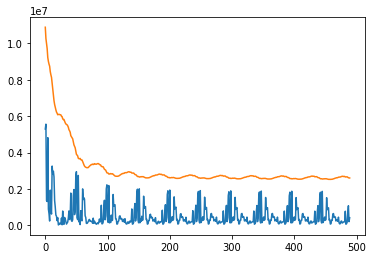

In [66]:
import matplotlib.pyplot as plt
lossfordraw=[]
lossvalidation=[]
time=0
w=5
b=5
w1=w
b1=b
(lmin,w1,b1)=loss_function_sum(5000,w,b)

for i in range (10):
    for j in range (0,4900,100):
        (l,w1,b1)=loss_function_sum(j,w,b)
        lossfordraw.append(l)
        w=w1
        b=b1
        if(l<lmin ):
            temp=lmin
            lmin=l
            wmin=w1
            bmin=b1
            if(temp-l>1):
                time=i
                #print(w,"  ",b,"  ",l)
        lossvalidation.append(loss_validation(w,b))
print(time,w,",",b,l)

plt.plot(lossfordraw)
plt.plot(lossvalidation)

plt.savefig('loss.jpg')
loss_validation(w,b)

In [14]:
create_test_submission(0.7997968518157101 , 6.379031073712957)

In [13]:
def create_test_submission(w,b):
    test_feat= []
    test_label=[]
    test_title =[]
    row=9
    for i in range(260):
        pm25_mean=0
        for j in range(2,11):
            pm25_mean+=float(test[j][row])
            test_feat.append(pm25_mean/9)
        row+=18
    test_title.append("id")
    test_label.append("value")
    for i in range (260):
        test_title.append("id_"+str(i))
        test_label.append(test_feat[i]*w+b)

    df =pd.DataFrame(test_label,test_title)
    df.to_csv("my_submission.csv",header=False)